<a href="https://colab.research.google.com/github/TomSwifter/Clock/blob/master/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

uni # TODO: Replace this with your UNI

# MNIST Sign Language

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import backend as K


Using TensorFlow backend.


In [0]:
class SignLanguage:
    def __init__(self):
        self.model = None # should be my compiled sequential model.
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        model = Sequential() 
        # Add layers: 
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(25, activation='softmax'))
        #print(model.summary())
            
        # Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        #Mainly this splits the data into training and validation sets. 
        # You may choose to normalize or downsample your data here, as well.
        # reshape each example into a 2D image (28, 28, 1)
        
        
        # split data
        x_train, x_test, y_train, y_test = train_test_split(images,labels, test_size=0.33)
       
        
        if K.image_data_format() == 'channels_first':
          x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
          x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
          input_shape = (1, 28, 28)
        else:
          x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
          x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
          input_shape = (28, 28, 1)
        
        # Normalize 
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
#         print('x_train shape:', x_train.shape)
#         print(x_train.shape[0], 'train samples')
#         print(x_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices (One-hot encoding)
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        self.data = {
            "train": (x_train, y_train),
            "test" : (x_test, y_test)
        }
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        
        # This method invokes the training of the model.
        # Make sure to return the generated history object. Your model will be trained for a max of
        # 50 epochs during grading. Make sure you are using the input parameters (batch_size,epochs, verbose)
        x_train, y_train = self.data["train"]
        x_test, y_test = self.data["test"]
        
        history = self.model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

        return history
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # This method will be invoked with the test images. Make sure to
        # downsample/resize the test images the same way as the training images, and return a
        # list of predictions.
        
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        
        
        x_test = data
        
        # Normalizing the data 
        if K.image_data_format() == 'channels_first':
          x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
          input_shape = (1, 28, 28)
        else:
          x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
          input_shape = (28, 28, 1)

        x_test = x_test.astype('float32')
        x_test /= 255
        
       
        
        prediction = self.model.predict(x_test)
        prediction = np.argmax(prediction, axis=1)

        
        return prediction
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [0]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [0]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


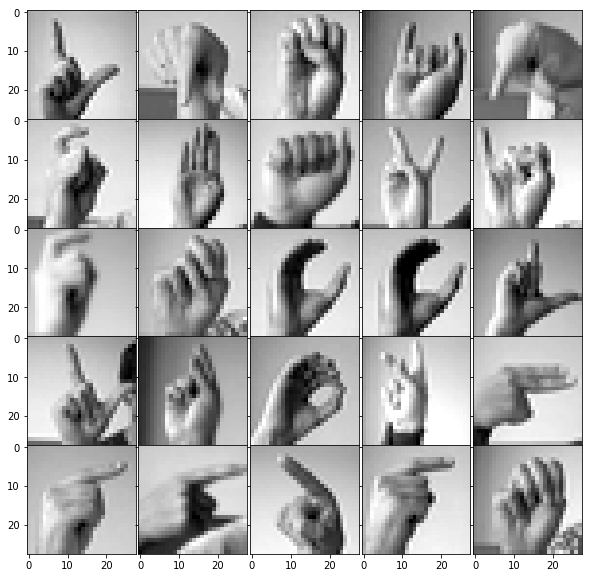

In [0]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Instructions for updating:
Use tf.cast instead.
Train on 18394 samples, validate on 9061 samples
Epoch 1/30
18394/18394 [==============================] - 5s 254us/step - loss: 2.0697 - acc: 0.3795 - val_loss: 0.5840 - val_acc: 0.8636
Epoch 2/30
18394/18394 [==============================] - 2s 85us/step - loss: 0.6633 - acc: 0.7862 - val_loss: 0.1351 - val_acc: 0.9801
Epoch 3/30
18394/18394 [==============================] - 2s 85us/step - loss: 0.3260 - acc: 0.8950 - val_loss: 0.0386 - val_acc: 0.9988
Epoch 4/30
18394/18394 [==============================] - 2s 85us/step - loss: 0.2005 - acc: 0.9350 - val_loss: 0.0155 - val_acc: 0.9992
Epoch 5/30
18394/18394 [==============================] - 2s 83us/step - loss: 0.1487 - acc: 0.9532 - val_loss: 0.0072 - val_acc: 0.9990
Epoch 6/30
18394/18394 [==============================] - 1s 81us/step - loss: 0.1155 - acc: 0.9645 - val_loss: 0.0038 - val_acc: 0.9999
Epoch 7/30
18394/18394 [==============================] - 1s 81us/step - loss: 0

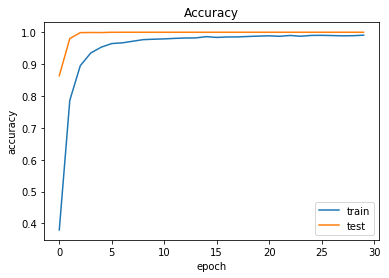

In [0]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [0]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

0.9012827663134412
